## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2026


# Project Checkpoint 1: Dataset Comparison, Selection, and EDA


## (A) Identification of Candidate Datasets

Identify three candidate datasets. Each dataset should:

- Align with at least one course topic (e.g., frequent itemsets, graphs, clustering, text, anomaly detection)

- Provide opportunities for at least one beyond-course technique



Example candidate datasets + techniques:
Retail transaction logs
- Course: Frequent Itemsets, Association Rules
- Beyond course: Bonferroni-corrected correlations, Chi-squared analyses, ANOVA analyses

Social network graph
- Course: Graph Mining, PageRank, Community Detection
- Beyond course: Graph neural networks

Product reviews or tweets
- Course: Text Mining, embeddings
- Beyond course: Topic modeling, transformer-based embeddings

Sensor or network logs
- Course: Anomaly Detection, Streams
- Beyond course: Autoencoder-based anomalies



For each dataset, provide:
- Dataset name and source – Ex: Online Retail Dataset
- Course topic alignment – Ex: Frequent itemsets and association rule mining
- Potential beyond-course techniques – Ex: Sequential pattern mining not covered in lecture
- Dataset size and structure – Ex: 500K transactions, variable-length item baskets
- Data types – Ex: Transaction IDs, item IDs, timestamps
- Target variable(s), if any – Exs: None (unsupervised pattern mining), Engagement, Price
- Licensing or usage constraints – Ex: CC License



Here are possible conferences at which to find both datasets and beyond-course techniques:

- KDD: https://kdd2025.kdd.org/datasets-and-benchmarks-track-papers-2/ Links to an external site.

- WSDM: https://www.wsdm-conference.org/2025/accepted-papers/ Links to an external site.

- RecSys: https://recsys.acm.org/recsys25/accepted-contributions/ Links to an external site.

- ACL: https://2025.aclweb.org/program/main_papers/ Links to an external site.

- EMNLP: https://2025.emnlp.org/program/main_papers/ Links to an external site.

- ICWSM: https://www.icwsm.org/2025/schedule/allpapers.html Links to an external site.



To work with conference papers:

Copy-paste the paper title that you’re interested in into Google Scholar to find the pdf.
See if the paper has a code link/dataset link. We do NOT recommend re-implementing algorithms from the papers by hand – you want to find a paper that has existing code.
You may have to try multiple (many) papers to find a dataset that is downloadable/workable, and code that is runnable. This is expected, and part of the process.

## Candidate datasets

- Shuyang Li. (2019). Food.com Recipes and Interactions [Data set]. Kaggle. https://doi.org/10.34740/KAGGLE/DSV/783630
- Reddit Pizza Requests | Tim Althoff, Cristian Danescu-Niculescu-Mizil, Dan Jurafsky. How to Ask for a Favor: A Case Study on the Success of Altruistic Requests. ICWSM, 2014.
- Reddit Hyperlink Network Dataset| S. Kumar, W.L. Hamilton, J. Leskovec, D. Jurafsky. Community Interaction and Conflict on the Web. World Wide Web Conference, 2018.

## Food.com

### Course Topic alignment

* Frequent Itemset Mining / Association Rules: treat ingredients as a basket and mine co-occurring ingredient sets.
* Text Mining: reviews + recipe steps/title text for embeddings, similarity, sentiment-style signals.

### Beyond course

* User-recipe bipartite graph recommendors.

### Dataset size and structure

* ~231,637 recipes** in a recipe table + ~1,132,367 user–recipe interactions** in an interactions table. (Two-table relational structure joined by recipe_id and user_id.)

### Data types

* `recipe_id`, `user_id` (IDs)
* `date/submitted` (timestamps)
* `rating` (numeric)
* `review`, `name/title`, `description` (text)
* `ingredients`, `tags`, `steps` (list / variable-length arrays)
* `minutes`, `n_ingredients`, `n_steps`, `nutrition` (numeric / numeric vector)

### Target Variables

* `rating` (1-5) in interactions maybe or none

### Licensing
* Kaggle dataset license is listed as Data files © Original Authors with author Shuyang Li- UCSD PhD researcher

----

## Reddit “Random Acts of Pizza”

### Course Topic alignment

* Text Mining: request narratives (language, persuasion cues) as the main signal.
* ML: Classification of success vs failure.
* Stream Mining: time effects / drift in language + success rates across the dataset timeline.

### Beyond course

* Transformer classifiers for request text

### Dataset size and structure

* 5,671 request posts total; one JSON record per request containing the request text + metadata + a binary outcome label (successful/unsuccessful).

### Data types

* `request_text`, `request_title` (text)
* `time of request` (timestamp)
* requester history/activity features (numeric counts, tenure-like metadata)
* outcome label: `successful/unsuccessful` (binary)

### Target Variable

* `requester_received_pizza` (success/fail)

### Licensing
* SNAP research dataset (no explicit CC license stated on page)


----
## Reddit Hyperlink Network Dataset

### Course Topic alignment

* Graph Mining: centrality (PageRank/in-degree), community detection, SCC/WCC structure, reciprocity.
* Graph Embeddings: node embeddings for similarity, clustering, and downstream prediction tasks.

### Beyond course

* Graph Neural Networks

### Dataset size and structure

* 67,180 subreddits (nodes) and 339,643 directed unique hyperlinks (edges). Each edge is **timestamped** and includes attributes like sentiment / text-derived properties.

### Data types

* `SOURCE_SUBREDDIT`, `TARGET_SUBREDDIT` (categorical node IDs)
* `POST_ID` (ID)
* `TIMESTAMP` (timestamp)
* `LINK_SENTIMENT` (signed label, e.g., -1/1)
* `text property vector` / feature vector of source post (numeric vector)

### Target Variable
* `LINK_SENTIMENT` or `POST_LABEL` (-1 vs +1)

### Licensing
* SNAP research dataset (no explicit CC license stated on page)

```
On my honor, I declare the following resources:
1. Collaborators:
None

2. Web Sources:
https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions/data

https://snap.stanford.edu/data/web-RedditPizzaRequests.html

https://snap.stanford.edu/data/soc-RedditHyperlinks.html

3. AI Tools:
- ChatGPT: I used it to search datasets also format the above mentioned details and extend them.

# (B) Comparative Analysis of Datasets

Compare the three datasets with respect to both data properties AND course vs external techniques.



These are the required comparison dimensions that you should write up in a table in your report:

Supported data mining tasks – Ex:
- Retail data: Frequent itemsets (course), sequential patterns (external)
- Graph data: Centrality (course), node embeddings (external)
- Review data: Text mining (course), topic modeling (external)

Data quality issues – Ex:
- Missing transactions
- Noisy text
- Graph sparsity or disconnected components

Algorithmic feasibility – Ex:
- Can Apriori work on a dataset of this size?
- Is sequential pattern mining computationally feasible?
- Is graph size manageable without Spark?

Bias considerations – Ex:
- Recommendation bias in retail data
- Sampling bias in social media text

Ethical considerations – Ex:

- Will pursuing this analysis harm anyone?

- What are the social power dynamics involved in this dataset (e.g., employer vs. employee dynamic)?

In [4]:
%pip install networkx pandas numpy matplotlib scipy scikit-learn
%pip install python-louvain igraph

import os, io, gzip, zipfile, tarfile, sys, math, random
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pathlib import Path

# For reproducibility
random.seed(42)
np.random.seed(42)

print(nx.__version__)

3.6.1


# Food.com

In [18]:
src = Path("kaggle.json")
assert src.exists(), "kaggle.json not found in the current directory (did upload work?)"

kaggle_dir = Path.home() / ".kaggle"
kaggle_dir.mkdir(parents=True, exist_ok=True)

dst = kaggle_dir / "kaggle.json"
dst.write_bytes(src.read_bytes())
os.chmod(dst, 0o600)

print("Installed Kaggle credentials at:", dst)

Installed Kaggle credentials at: /root/.kaggle/kaggle.json


In [19]:

DATASET = "shuyangli94/food-com-recipes-and-user-interactions"
OUT_DIR = Path("data/foodcom")
OUT_DIR.mkdir(parents=True, exist_ok=True)

!kaggle datasets download -d {DATASET} -p {OUT_DIR} --unzip
print("Downloaded into:", OUT_DIR.resolve())

Dataset URL: https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions
License(s): copyright-authors
 91% 242M/267M [00:00<00:00, 324MB/s]
100% 267M/267M [00:00<00:00, 313MB/s]
Downloaded into: /content/data/foodcom


In [25]:
root = Path("data/foodcom")

train = pd.read_csv(root / "interactions_train.csv")
val   = pd.read_csv(root / "interactions_validation.csv")
test  = pd.read_csv(root / "interactions_test.csv")

pp_recipes = pd.read_csv(root / "PP_recipes.csv", low_memory=False)
pp_users   = pd.read_csv(root / "PP_users.csv", low_memory=False)

raw_recipes = pd.read_csv(root / "RAW_recipes.csv", low_memory=False)
raw_interactions = pd.read_csv(root / "RAW_interactions.csv", low_memory=False)

In [37]:
pp_recipes.head()

,id,i,name_tokens,ingredient_tokens,steps_tokens,techniques,calorie_level,ingredient_ids
0,424415,23,"[40480, 37229, 2911, 1019, 249, 6878, 6878, 28...","[[2911, 1019, 249, 6878], [1353], [6953], [153...","[40480, 40482, 21662, 481, 6878, 500, 246, 161...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[389, 7655, 6270, 1527, 3406]"
1,146223,96900,"[40480, 18376, 7056, 246, 1531, 2032, 40481]","[[17918], [25916], [2507, 6444], [8467, 1179],...","[40480, 40482, 729, 2525, 10906, 485, 43, 8393...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[2683, 4969, 800, 5298, 840, 2499, 6632, 7022,..."
2,312329,120056,"[40480, 21044, 16954, 8294, 556, 10837, 40481]","[[5867, 24176], [1353], [6953], [1301, 11332],...","[40480, 40482, 8240, 481, 24176, 296, 1353, 66...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,"[1257, 7655, 6270, 590, 5024, 1119, 4883, 6696..."
3,74301,168258,"[40480, 10025, 31156, 40481]","[[1270, 1645, 28447], [21601], [27952, 29471, ...","[40480, 40482, 5539, 21601, 1073, 903, 2324, 4...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,"[7940, 3609, 7060, 6265, 1170, 6654, 5003, 3561]"
4,76272,109030,"[40480, 17841, 252, 782, 2373, 1641, 2373, 252...","[[1430, 11434], [1430, 17027], [1615, 23, 695,...","[40480, 40482, 14046, 1430, 11434, 488, 17027,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",0,"[3484, 6324, 7594, 243]"


In [38]:
pp_users.head()

,u,techniques,items,n_items,ratings,n_ratings
0,0,"[8, 0, 0, 5, 6, 0, 0, 1, 0, 9, 1, 0, 0, 0, 1, ...","[1118, 27680, 32541, 137353, 16428, 28815, 658...",31,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 4.0, ...",31
1,1,"[11, 0, 0, 2, 12, 0, 0, 0, 0, 14, 5, 0, 0, 0, ...","[122140, 77036, 156817, 76957, 68818, 155600, ...",39,"[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...",39
2,2,"[13, 0, 0, 7, 5, 0, 1, 2, 1, 11, 0, 1, 0, 0, 1...","[168054, 87218, 35731, 1, 20475, 9039, 124834,...",27,"[3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, ...",27
3,3,"[498, 13, 4, 218, 376, 3, 2, 33, 16, 591, 10, ...","[163193, 156352, 102888, 19914, 169438, 55772,...",1513,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, ...",1513
4,4,"[161, 1, 1, 86, 93, 0, 0, 11, 2, 141, 0, 16, 0...","[72857, 38652, 160427, 55772, 119999, 141777, ...",376,"[5.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, ...",376


In [39]:
train.head()

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723


In [41]:
raw_recipes.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [44]:
raw_interactions.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


The Food.com dataset is provided in two parallel representations: a raw, human-readable view and a preprocessed view used for model reproduction. In the raw view, RAW_recipes.csv is keyed by id and contains recipe metadata like name, ingredients (as a list of strings), steps, tags, and nutrition, while RAW_interactions.csv contains user feedback with user_id, recipe_id, date, rating, and a free-text review. These join directly by recipe id using RAW_interactions.recipe_id = RAW_recipes.id to attach ingredients and other recipe fields to each interaction. In the preprocessed view, the interaction splits interactions_train.csv, interactions_validation.csv, and interactions_test.csv store the same interaction events but include both the original Food.com identifiers (user_id, recipe_id) and dense indices (u, i). PP_recipes.csv maps each recipe’s raw id (id, matching recipe_id) to its dense index i and stores tokenized text fields (name_tokens, ingredient_tokens, steps_tokens) and engineered features such as ingredient_ids, techniques, and calorie_level. PP_users.csv is keyed by the dense user index u and summarizes each user’s history via items (a list of recipe indices i) and ratings, plus user-level aggregates.

In [32]:
def sanity(df, name):
    print(f"\n {name}")
    print("shape:", df.shape)
    print("columns:", list(df.columns))

sanity(train, "interactions_train")
sanity(val,   "interactions_validation")
sanity(test,  "interactions_test")
sanity(pp_recipes, "PP_recipes")
sanity(pp_users,   "PP_users")

train2 = train.assign(split="train")
val2   = val.assign(split="validation")
test2  = test.assign(split="test")

interactions_all = pd.concat([train2, val2, test2], ignore_index=True)

print("\n interactions_all")
print("shape:", interactions_all.shape)
print(interactions_all["split"].value_counts())



 interactions_train
shape: (698901, 6)
columns: ['user_id', 'recipe_id', 'date', 'rating', 'u', 'i']

 interactions_validation
shape: (7023, 6)
columns: ['user_id', 'recipe_id', 'date', 'rating', 'u', 'i']

 interactions_test
shape: (12455, 6)
columns: ['user_id', 'recipe_id', 'date', 'rating', 'u', 'i']

 PP_recipes
shape: (178265, 8)
columns: ['id', 'i', 'name_tokens', 'ingredient_tokens', 'steps_tokens', 'techniques', 'calorie_level', 'ingredient_ids']

 PP_users
shape: (25076, 6)
columns: ['u', 'techniques', 'items', 'n_items', 'ratings', 'n_ratings']

 interactions_all
shape: (718379, 7)
split
train         698901
test           12455
validation      7023
Name: count, dtype: int64


In [45]:
df = interactions_all

n_inter = len(df)
n_users = df["user_id"].nunique()
n_items = df["recipe_id"].nunique()

print("Interactions:", n_inter)
print("Users (unique user_id):", n_users)
print("Recipes (unique recipe_id):", n_items)

# Sparsity proxy: observed / possible in user×recipe matrix
density = n_inter / (n_users * n_items)
print("UserxRecipe density:", density)

# Split sizes (already present; not re-splitting)
print("\nSplit counts:")
print(df["split"].value_counts())

# Ratings
print("\nRating distribution:")
print(df["rating"].value_counts().sort_index())

# Date coverage
d = pd.to_datetime(df["date"], errors="coerce")
print("\nDate range:", d.min(), "->", d.max())
print("Bad date parse (%):", (d.isna().mean() * 100))


Interactions: 718379
Users (unique user_id): 25076
Recipes (unique recipe_id): 178265
UserxRecipe density: 0.00016070496097160122

Split counts:
split
train         698901
test           12455
validation      7023
Name: count, dtype: int64

Rating distribution:
rating
0.0     18000
1.0      3722
2.0      7336
3.0     27058
4.0    131846
5.0    530417
Name: count, dtype: int64

Date range: 2000-02-25 00:00:00 -> 2018-12-19 00:00:00
Bad date parse (%): 0.0


The Food.com portion we used is organized around three interaction splits and two preprocessed metadata tables. The interaction data is already split into interactions_train (698,901 rows), interactions_validation (7,023 rows), and interactions_test (12,455 rows), and each split has the same six columns: user_id and recipe_id are the original Food.com identifiers, date and rating record when and how the user rated the recipe, and u and i are the corresponding dense indices used to join into the preprocessed tables. The preprocessed recipe table PP_recipes has 178,265 recipes and includes both the original recipe id (id) and the dense recipe index i, along with tokenized representations of the recipe text (name_tokens, ingredient_tokens, steps_tokens) and engineered recipe features such as techniques, calorie_level, and ingredient_ids. The preprocessed user table PP_users has 25,076 users keyed by u and stores each user’s interaction history compactly as a list of item indices (items) with matching ratings, plus counts (n_items, n_ratings) and a techniques profile.
When we concatenate the three interaction splits and add a split label, we get interactions_all with 718,379 total interactions (698,901 train / 7,023 validation / 12,455 test). Across this combined set there are 25,076 unique users and 178,265 unique recipes, which implies an extremely sparse user–recipe matrix: the observed density is about 0.0001607 (roughly 0.016% of all possible user–recipe pairs are actually rated). Ratings are heavily skewed toward high scores, with 530,417 ratings of 5 and 131,846 ratings of 4, while lower ratings are comparatively rare (including 18,000 zeros, which likely represent a special case in the dataset rather than a typical star rating). The interactions span a long time window from 2000-02-25 to 2018-12-19, and the date field parses cleanly with 0% parse failures.

We can also do some data quality analysis:

In [35]:
df = interactions_all

print("Missingness (%), key cols:")
for c in ["user_id","recipe_id","date","rating","u","i"]:
    print(c, (df[c].isna().mean()*100))

# Duplicate user-recipe pairs (important for “quality issues” + modeling)
dup_pair_rate = df.duplicated(subset=["user_id","recipe_id"]).mean() * 100
print("\nDuplicate user-recipe pair rate (%):", dup_pair_rate)

Missingness (%), key cols:
user_id 0.0
recipe_id 0.0
date 0.0
rating 0.0
u 0.0
i 0.0

Duplicate user-recipe pair rate (%): 0.0


Evidently the data quality is quite good and it is already cleaned.

Popularity Bias:

In [46]:
df = interactions_all

per_user = df.groupby("user_id").size()
per_item = df.groupby("recipe_id").size()

print("Interactions per user (median, p90, p99):",
      per_user.quantile(0.5), per_user.quantile(0.9), per_user.quantile(0.99))

print("Interactions per recipe (median, p90, p99):",
      per_item.quantile(0.5), per_item.quantile(0.9), per_item.quantile(0.99))

# How concentrated are interactions in top items? (classic popularity bias indicator)
top1 = per_item.sort_values(ascending=False).head(1).sum() / len(df)
top100 = per_item.sort_values(ascending=False).head(100).sum() / len(df)

print("Share of interactions in top-1 recipe:", top1)
print("Share of interactions in top-100 recipes:", top100)


Interactions per user (median, p90, p99): 7.0 46.0 400.0
Interactions per recipe (median, p90, p99): 2.0 8.0 37.0
Share of interactions in top-1 recipe: 0.0015186969552283683
Share of interactions in top-100 recipes: 0.04989427586274098


User and recipe activity are long-tailed. The median user has 7 interactions, but heavy users reach 46 at the 90th percentile and 400 at the 99th. Recipes are even sparser: the median recipe has 2 interactions, with 8 at the 90th percentile and 37 at the 99th. Popularity is concentrated: the top recipe accounts for about 0.152% of all interactions, and the top 100 recipes account for about 4.99%, indicating clear head–tail imbalance (popularity/exposure bias).

This is a user item interaction dataset where each record is a user rating a recipe on a date. Course tasks include simple aggregation like most rated recipes, average ratings per recipe, and basic user and item profiling. It also supports frequent itemset mining if we treat each recipe as a basket of ingredients using RAW_recipes.ingredients or PP_recipes.ingredient_ids. External techniques fit naturally. We can run collaborative filtering baselines like matrix factorization, build hybrid recommenders that combine interactions with recipe content such as ingredients, steps, tags, or tokenized text, and do sequence aware recommendation by ordering interactions by date.

#### Data quality issues

Core fields are complete in the splits we checked and the schema is consistent across the tables. We can join using raw ids or the dense indices u and i when linking interactions to PP_users and PP_recipes. The main issue is sparsity and long tail coverage. Matrix density is about 0.0001607, the median user has 7 interactions with p90 equal to 46 and p99 equal to 400, and the median recipe has 2 interactions with p90 equal to 8 and p99 equal to 37. Ratings are skewed high, mostly 4 and 5. If rating equal to 0 appears, it likely needs special handling instead of treating it as a standard zero star rating.

#### Algorithmic feasibility

With 718379 interactions, standard summaries and baseline recommenders are feasible on a single machine. Matrix factorization methods and kNN baselines are practical, but tail sparsity will limit performance and can make evaluation unstable unless we use a careful split and metrics. Apriori over ingredient baskets can become expensive if the ingredient vocabulary is large, so we need conservative minimum support and we may need to restrict to frequent ingredients or subsets.

We can also model the data as a bipartite graph with user nodes and recipe nodes and an edge per rating, optionally weighted by rating or time. With about 25k users, 178k recipes, and 718k edges, basic graph computations are feasible on a single machine if we ran efficient graph library and avoid all pairs operations. Degree summaries, connected components on the undirected version, and simple random walk methods are practical. Projecting to user-user or recipe-recipe graphs can explode in edge count, especially on the recipe side, so do projection with thresholds or sampling. Node embeddings on the bipartite graph are feasible but need careful parameters and memory management because the graph is large and skewed.

#### Bias

The long tail implies popularity and exposure bias. Head recipes get far more feedback while most recipes are under observed, and we noted that the top 100 recipes account for about 4.99 percent of interactions. Heavy users contribute disproportionately, so models can optimize for frequent raters and amplify majority preferences. Missing interactions are not true negatives because users only rate what they choose to engage with.

#### Ethical considerations

This dataset is lower risk than datasets involving sensitive outcomes, but it still reflects platform exposure and cultural skew. Recipes that are more visible get more interactions, which then reinforces visibility through recommendation loops. Results can overrepresent dominant cuisines, dietary norms, and user groups that are more active on the platform. Avoid presenting findings as general nutrition or health guidance because ratings reflect preference and context, not dietary quality. The main power dynamic is the platform shaping exposure, which shapes ratings, which then shapes recommendations.


# Reddit “Random Acts of Pizza”

In [47]:
import tarfile, urllib.request

RAOP_URL = "http://cs.stanford.edu/~althoff/raop-dataset/pizza_request_dataset.tar.gz"
LOCAL_DIR = "data"
TGZ_PATH = os.path.join(LOCAL_DIR, "pizza_request_dataset.tar.gz")

os.makedirs(LOCAL_DIR, exist_ok=True)

print(f"Downloading RAOP from {RAOP_URL} ...")
urllib.request.urlretrieve(RAOP_URL, TGZ_PATH)

mb = os.path.getsize(TGZ_PATH) / (1024*1024)
print(f"Saved: {TGZ_PATH} ({mb:.2f} MB)")

with tarfile.open(TGZ_PATH, "r:gz") as tar:
    tar.extractall(path=LOCAL_DIR)

print("Extracted files:", sorted(os.listdir(LOCAL_DIR))[:20])

Saved: data/pizza_request_dataset.tar.gz (2.63 MB)
Extracted files: ['body.tsv', 'foodcom', 'foodcom_processed', 'pizza_request_dataset', 'pizza_request_dataset.tar.gz', 'title.tsv']


/tmp/ipython-input-2053455619.py:16: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=LOCAL_DIR)


Sample Data:

In [51]:
import json

json_path = os.path.join("data", "pizza_request_dataset","pizza_request_dataset.json")

with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

print("Top-level type:", type(data))
if isinstance(data, list):
    print("Num records:", len(data))
    first = data[0]
elif isinstance(data, dict):
    print("Top-level keys:", list(data.keys())[:30])
    # try the common case: dict of id -> record, or dict with a records list
    first = next(iter(data.values())) if data else None
else:
    first = None

print("First record type:", type(first))
print("Num keys in first:", len(first))
print("Keys:", sorted(first.keys()))

for k in ["request_id", "requester_username", "request_title", "request_text", "requester_received_pizza"]:
    if k in first:
        v = first[k]
        if isinstance(v, str):
            print(f"\n{k} (preview):", v[:200].replace("\n", " "))
        else:
            print(f"\n{k}:", v)

Exists? True | Path: data/pizza_request_dataset/pizza_request_dataset.json
Top-level type: <class 'list'>
Num records: 5671
First record type: <class 'dict'>
Num keys in first: 33
Keys: ['giver_username_if_known', 'in_test_set', 'number_of_downvotes_of_request_at_retrieval', 'number_of_upvotes_of_request_at_retrieval', 'post_was_edited', 'request_id', 'request_number_of_comments_at_retrieval', 'request_text', 'request_text_edit_aware', 'request_title', 'requester_account_age_in_days_at_request', 'requester_account_age_in_days_at_retrieval', 'requester_days_since_first_post_on_raop_at_request', 'requester_days_since_first_post_on_raop_at_retrieval', 'requester_number_of_comments_at_request', 'requester_number_of_comments_at_retrieval', 'requester_number_of_comments_in_raop_at_request', 'requester_number_of_comments_in_raop_at_retrieval', 'requester_number_of_posts_at_request', 'requester_number_of_posts_at_retrieval', 'requester_number_of_posts_on_raop_at_request', 'requester_number_of_

Let's check for data quality issues

In [53]:
records = data if isinstance(data, list) else list(data.values())
n = len(records)
print("Num records:", n)

FIELDS = ["request_id", "request_title", "request_text", "requester_received_pizza", "requester_username"]

for field in FIELDS:
    missing = 0
    empty = 0
    for r in records:
        if field not in r:
            missing += 1
        else:
            v = r[field]
            if isinstance(v, str) and v.strip() == "":
                empty += 1
    print(f"{field:26s} missing: {missing:6d} | empty_string: {empty:6d}")


Num records: 5671
request_id                 missing:      0 | empty_string:      0
request_title              missing:      0 | empty_string:      0
request_text               missing:      0 | empty_string:    159
requester_received_pizza   missing:      0 | empty_string:      0
requester_username         missing:      0 | empty_string:      0


The dataset has 5671 records and the core fields are complete. The request id, title, label for receiving pizza, and username are present for every record with no missing values. The main data quality issue is in the request text field, where 159 records contain an empty string, which is about 2.8 percent of the dataset. This matters because any analysis that relies on the narrative content will have less information for those cases, so they should be filtered out or handled as title only entries to avoid skewing text based features and evaluation.

In [54]:
from collections import Counter


labels = [r["requester_received_pizza"] for r in records]
c = Counter(labels)

print("Counts:", dict(c))
print("Success rate:", c.get(True, 0) / len(labels))


Counts: {True: 1397, False: 4274}
Success rate: 0.24634103332745547


The dataset is imbalanced toward unsuccessful requests. Out of 5671 records, 1397 are labeled as received pizza and 4274 are labeled as not received pizza, which puts the success rate at about 24.6 percent. This imbalance affects modeling choices and evaluation because a naive classifier that predicts failure for every request would still achieve a high accuracy, so it is better to use metrics like precision, recall, and F1 for the success class and to consider simple balancing strategies during training. The imbalance can also reflect platform and participation effects, since only a subset of requests get fulfilled, which is relevant when discussing bias and representativeness.

Based on the above observations we can perform a deeper data quality analysis.

In [56]:
from collections import Counter

# text length stats + empty/very short counts
lengths = []
empty_ct = 0
short_ct = 0
SHORT_N = 20

for r in records:
    txt = r.get("request_text", "")
    if not isinstance(txt, str):
        txt = "" if txt is None else str(txt)
    t = txt.strip()
    if t == "":
        empty_ct += 1
        L = 0
    else:
        L = len(t)
        if L < SHORT_N:
            short_ct += 1
    lengths.append(L)

lengths_sorted = sorted(lengths)
n = len(lengths_sorted)

def q(p):
    idx = int(round(p * (n - 1)))
    return lengths_sorted[idx]

print("Text length stats (chars, stripped):")
print("min:", lengths_sorted[0], "median:", q(0.50), "p90:", q(0.90), "p95:", q(0.95), "max:", lengths_sorted[-1])
print("empty request_text:", empty_ct, f"({empty_ct/n:.4f})")
print(f"non-empty but < {SHORT_N} chars:", short_ct, f"({short_ct/n:.4f})")

# success rate for empty-text subset vs non-empty
empty_labels = []
nonempty_labels = []

for r in records:
    txt = r.get("request_text", "")
    if not isinstance(txt, str):
        txt = "" if txt is None else str(txt)
    is_empty = (txt.strip() == "")
    y = r["requester_received_pizza"]
    (empty_labels if is_empty else nonempty_labels).append(y)

def rate(lbls):
    return (sum(1 for v in lbls if v is True) / len(lbls)) if lbls else float("nan")

print("\nSuccess rate by text emptiness:")
print("empty_text n:", len(empty_labels), "rate:", rate(empty_labels))
print("nonempty_text n:", len(nonempty_labels), "rate:", rate(nonempty_labels))

# duplicates (request_id and exact request_text)
ids = [r.get("request_id") for r in records]
id_counts = Counter(ids)
dup_ids = sum(1 for k,v in id_counts.items() if v > 1)

texts = []
for r in records:
    txt = r.get("request_text", "")
    if not isinstance(txt, str):
        txt = "" if txt is None else str(txt)
    texts.append(txt.strip())

text_counts = Counter(texts)
dup_texts = sum(1 for k,v in text_counts.items() if k != "" and v > 1)

print("\nDuplicate checks:")
print("distinct request_id:", len(id_counts), "duplicate request_id values:", dup_ids)
print("distinct request_text (stripped):", len(text_counts), "duplicate non-empty request_text values:", dup_texts)


Text length stats (chars, stripped):
min: 0 median: 307 p90: 805 p95: 1048 max: 7195
empty request_text: 159 (0.0280)
non-empty but < 20 chars: 34 (0.0060)

Success rate by text emptiness:
empty_text n: 159 rate: 0.1320754716981132
nonempty_text n: 5512 rate: 0.24963715529753266

Duplicate checks:
distinct request_id: 5671 duplicate request_id values: 0
distinct request_text (stripped): 5512 duplicate non-empty request_text values: 1


The request text has a wide length range, with a median of 307 characters, a 90th percentile of 805, a 95th percentile of 1048, and a maximum of 7195. There are 159 requests with empty request text, which is about 2.8 percent of the dataset, and 34 additional requests with very short text under 20 characters. The success rate differs noticeably by text availability, with empty text requests succeeding at about 13.2 percent versus about 25.0 percent for nonempty text, so leaving empty text cases in a text based analysis can introduce a systematic skew. Identifiers look clean because request ids are unique with no duplicates, and the text content is almost entirely unique as well, with only one duplicated nonempty request text, which reduces concerns about duplicate driven leakage in modeling and evaluation.

This dataset supports standard supervised learning tasks from the course because it has a clear binary outcome label in requester_received_pizza. A straightforward course baseline is text based classification using request_title and request_text, and we can also add simple user level covariates if we confirm they exist consistently. It also supports basic descriptive mining like comparing successful versus unsuccessful requests by length, vocabulary richness, and presence of specific cues. For external techniques, it naturally supports modern text representations such as document embeddings and transformer based encoders, as well as causal style analyses like estimating the effect of narrative features while controlling for user attributes, provided we are careful about leakage and temporal ordering.

#### Data quality issues
The core fields are structurally clean. Request id, title, username, and the outcome label are present for all 5671 records with no missing values. The main quality issue is content sparsity in request_text, where 159 records have empty text and another 34 are very short under 20 characters. This matters because those cases have less signal for text mining and they behave differently, with a noticeably lower success rate than the nonempty cases. Apart from that, duplication does not appear to be a problem because request ids are unique and there is only one duplicated nonempty request_text, so evaluation is unlikely to be distorted by repeated entries.

#### Algorithmic feasibility
The dataset size is modest and easy to handle on a single machine without distributed tools. With 5671 records, we can run baselines like bag of words features with logistic regression or naive Bayes, and we can iterate on feature engineering quickly. The text lengths are also manageable, with a median of 307 characters and only a small tail up to about 7195 characters, so tokenization and standard vectorization are feasible. More expensive external methods like transformer embeddings or fine tuning are still feasible at this scale, but we should treat them as optional extensions and keep a simple baseline as the main deliverable.

#### Bias considerations
The class distribution is imbalanced, with 1397 successes and 4274 failures, which makes accuracy a misleading metric and pushes we toward precision, recall, and F1 for the success class. There is also a measurable content availability bias because empty text requests succeed at about 13.2 percent versus about 25.0 percent for nonempty requests. If we include empty text cases in a text based model without handling them explicitly, we risk learning artifacts that reflect missing content rather than narrative quality. More broadly, any patterns we find may reflect who chooses to post and how they write in that community, so generalizing beyond the platform should be framed carefully.

#### Ethical considerations
This dataset involves people requesting material help, so the core dynamic is between requesters who may be financially vulnerable and donors who decide whom to help. Modeling success can encode and amplify norms about what kinds of stories are rewarded, which has a real risk of encouraging performative or coercive narratives if results are presented as prescriptive advice. The safest framing is descriptive and diagnostic, focused on understanding community behavior and dataset properties, while avoiding recommendations that could pressure requesters to disclose more personal information to increase their chances.


# Reddit HyperLink Dataset

In [5]:
BODY_DATA_URL = "https://snap.stanford.edu/data/soc-redditHyperlinks-body.tsv"
TITLE_DATA_URL = "https://snap.stanford.edu/data/soc-redditHyperlinks-title.tsv"
LOCAL_PATH = "data/"

os.makedirs("data", exist_ok=True)

def download_dataset(url: str, to_path: str):
    import urllib.request
    print(f"Downloading from {url} ...")
    urllib.request.urlretrieve(url, to_path)
    size = os.path.getsize(to_path) / (1024*1024)
    print(f"Saved to {to_path} ({size:.2f} MB)")

download_dataset(BODY_DATA_URL, LOCAL_PATH+"body.tsv")
download_dataset(TITLE_DATA_URL, LOCAL_PATH+"title.tsv")

Saved to data/body.tsv (304.16 MB)
Saved to data/title.tsv (351.51 MB)


In [9]:
import pandas as pd
import networkx as nx

BODY_PATH  = "data/body.tsv"
TITLE_PATH = "data/title.tsv"

SRC   = "SOURCE_SUBREDDIT"
DST   = "TARGET_SUBREDDIT"
TIME  = "TIMESTAMP"
SIGN  = "LINK_SENTIMENT"

def load_tsv(path: str, kind: str) -> pd.DataFrame:
    df = pd.read_csv(path, sep="\t", comment="#", low_memory=False)
    df[TIME] = pd.to_datetime(df[TIME], errors="coerce")
    df["KIND"] = kind
    return df[[SRC, DST, TIME, SIGN, "KIND"]]

body  = load_tsv(BODY_PATH,  "body")
title = load_tsv(TITLE_PATH, "title")

df = pd.concat([body, title], ignore_index=True)

g_all = df.groupby([SRC, DST])
agg = pd.DataFrame({
    "weight":    g_all.size(),
    "sign_sum":  g_all[SIGN].sum(),
    "neg_frac":  g_all[SIGN].apply(lambda s: (s < 0).mean()),
    "first_ts":  g_all[TIME].min(),
    "last_ts":   g_all[TIME].max(),
}).reset_index()

# body/title-specific weights
pivot = df.pivot_table(index=[SRC, DST], columns="KIND", values=SIGN, aggfunc="size", fill_value=0)
pivot = pivot.reset_index().rename(columns={"body": "weight_body", "title": "weight_title"})
agg = agg.merge(pivot, on=[SRC, DST], how="left")

# Build the combined graph
G = nx.from_pandas_edgelist(
    agg,
    source=SRC,
    target=DST,
    edge_attr=["weight", "weight_body", "weight_title", "sign_sum", "neg_frac", "first_ts", "last_ts"],
    create_using=nx.DiGraph()
)

print("Combined graph:")
print("  nodes:", G.number_of_nodes())
print("  edges:", G.number_of_edges(), "(unique source-target pairs)")
print("  density:", nx.density(G))
print("  reciprocity:", nx.reciprocity(G))

# SCC/WCC quick stats
scc_sizes = [len(c) for c in nx.strongly_connected_components(G)]
wcc_sizes = [len(c) for c in nx.weakly_connected_components(G)]
print("  largest_SCC:", max(scc_sizes) if scc_sizes else 0)
print("  largest_WCC:", max(wcc_sizes) if wcc_sizes else 0)

# sanity: show one edge’s attributes
u, v, d = next(iter(G.edges(data=True)))
print("\nExample edge:", u, "->", v)
print(d)


Combined graph:
  nodes: 67180
  edges: 339643 (unique source-target pairs)
  density: 7.525738678606207e-05
  reciprocity: 0.1765147522545732
  largest_SCC: 21432
  largest_WCC: 65648

Example edge: 007 -> daniel_craig
{'weight': 1, 'weight_body': 0, 'weight_title': 1, 'sign_sum': 1, 'neg_frac': 0.0, 'first_ts': Timestamp('2016-02-21 11:31:51'), 'last_ts': Timestamp('2016-02-21 11:31:51')}


In [11]:
import networkx as nx

def internal_stats(G, nodes, max_nodes_for_apl=2000):
    H = G.subgraph(nodes)  # nodes = set/list of nodes in this SCC
    n = H.number_of_nodes()
    m = H.number_of_edges()

    avg_in  = (m / n) if n else 0.0
    avg_out = (m / n) if n else 0.0
    density = nx.density(H)

    # average shortest path length is expensive; skip if too big
    if n <= max_nodes_for_apl:
        apl = nx.average_shortest_path_length(H)
    else:
        apl = None

    print(f"Nodes: {n}, Edges: {m}")
    print(f"Avg in-degree:  {avg_in:.4f}")
    print(f"Avg out-degree: {avg_out:.4f}")
    print(f"Density: {density:.6e}")
    print(f"Avg path length: {apl if apl is not None else 'SKIPPED (too big)'}")

    return avg_in, avg_out, density, apl

def analyze_connectivity(G):
  sccs = list(nx.strongly_connected_components(G))
  largest_scc_size = max(len(scc) for scc in sccs)
  wccs = list(nx.weakly_connected_components(G))
  largest_wcc_size = max(len(wcc) for wcc in wccs)

  print(f"Number of SCCs: {len(sccs)}")
  print(f"Number of WCCs: {len(wccs)}")
  print(f"Size of largest SCC: {largest_scc_size}")
  print(f"Size of largest WCC: {largest_wcc_size}")

  return sccs, largest_scc_size, wccs, largest_wcc_size

sccs, largest_scc_size, wccs, largest_wcc_size = analyze_connectivity(G)

largest_sccs = sorted(sccs, key=len, reverse=True)[:3]

print("\nTop 3 Giant SCCs:\n----")
for i, scc in enumerate(largest_sccs, 1):
    print(f"SCC {i} size: {len(scc)}")
    internal_stats(G, scc)
    print()

Number of SCCs: 45564
Number of WCCs: 712
Size of largest SCC: 21432
Size of largest WCC: 65648

Top 3 Giant SCCs:
----
SCC 1 size: 21432
Nodes: 21432, Edges: 256254
Avg in-degree:  11.9566
Avg out-degree: 11.9566
Density: 5.579118e-04
Avg path length: SKIPPED (too big)

SCC 2 size: 5
Nodes: 5, Edges: 7
Avg in-degree:  1.4000
Avg out-degree: 1.4000
Density: 3.500000e-01
Avg path length: 1.85

SCC 3 size: 5
Nodes: 5, Edges: 7
Avg in-degree:  1.4000
Avg out-degree: 1.4000
Density: 3.500000e-01
Avg path length: 1.85



This dataset supports standard graph mining tasks from the course on a directed subreddit hyperlink graph. We can compute in degree and out degree, run PageRank, and study connectivity using SCC and WCC structure. Because edges include repeated link counts and a sentiment label, we can also treat the graph as weighted and signed. External techniques are a natural fit. We can learn node embeddings with node2vec or DeepWalk, run link prediction on the aggregated graph, and do signed link prediction using the link sentiment label. Since edges have timestamps, we can slice by time and study how linking behavior and centrality change across periods.

#### Data quality issues

The combined graph has 67180 nodes and 339643 unique directed edges, and the density is 7.53e-05, so the network is extremely sparse. Sparsity shows up in the component structure. There are 45564 SCCs but only 712 WCCs, which means most nodes connect when direction is ignored but strong mutual reachability is rare. Reciprocity is 0.1765, which is low and consistent with directional linking where many references are not returned. The sentiment label and related properties come from text, so they can be noisy and context dependent. A hyperlink can represent a mention, critique, or meta reference rather than endorsement, so the meaning of an edge is not always clean.

#### Algorithmic feasibility

This graph is manageable on a single machine without Spark if we aggregate repeated events into weighted edges. With 339643 edges, degree based rankings, PageRank, reciprocity, and SCC and WCC summaries are feasible in NetworkX. SCC and WCC decomposition is feasible at this scale, and the results show a dominant core with a largest WCC of 65648 nodes and a largest SCC of 21432 nodes. Node embeddings and link prediction are still feasible, but they are heavier because they rely on large numbers of random walks or training iterations, so they may need sampling and careful parameter choices. Full event level modeling is heavier and less appropriate for this checkpoint, and the aggregated graph is a practical compromise.

#### Connectivity

There are far more SCCs than WCCs, so reachability mostly exists only when we ignore direction. This matches a hyperlink network where links often point outward without forming cycles. The reciprocity value of 0.1765 supports this because only a minority of directed edges are paired by a reverse edge. The largest SCC is large but still sparse, with density 5.58e-04, so it forms a broad core where each subreddit links to only a small fraction of possible targets. Outside that core, most SCCs are tiny, including the size 5 components we observed, which likely correspond to niche groups with tight mutual linking.

#### Bias considerations

This is not a random sample of Reddit. It only includes hyperlinking behavior between subreddits that appear in posts, so it overrepresents active communities and topics that tend to cross reference others. Aggregation into unique edges also favors pairs with repeated interactions, so high volume communities and recurring cross links dominate centrality and embedding signals. The sentiment label can introduce systematic bias because it is derived from text and context, and sarcasm or community specific language can shift labels in consistent ways across topics. Temporal effects matter because subreddit popularity and norms change, so mixing long time windows can blur shifts and create misleading averages.

#### Ethical considerations and power dynamics

This is community level data, but it can still be used to rank, label, and target subreddits, which can amplify stigma toward controversial or marginalized communities. Sentiment annotated links can be interpreted as endorsement or hostility even when the underlying posts are nuanced, so downstream use can mischaracterize groups. The main power dynamic is platform and community influence. Large subreddits get more attention, drive more outgoing links, and can shape the visibility and reputation of smaller subreddits. If we present results, keep claims at the community level, avoid framing them as judgments about users, and avoid producing lists that could be used for harassment or coordinated targeting.

# Comparision Table

| Dimension                                 | Reddit Hyperlink Network (SNAP: title, body, combined directed graph)                                                                                                                                                     | Reddit Random Acts of Pizza (RAOP)                                                                                                                                                                         | Food.com recipes and ratings                                                                                                                                                                                                                          |
| ----------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| Supported data mining tasks               | Course: in out degree, PageRank, SCC WCC, reciprocity. External: node2vec DeepWalk, link prediction, signed link prediction, temporal slices.                                                                             | Course: binary classification, feature engineering on title text, simple group comparisons. External: embeddings and transformer encoders, causal style analysis of narrative cues, temporal drift checks. | Course: aggregations, user item profiling, ingredient basket itemsets. External: matrix factorization, hybrid recommenders with content, sequence aware recommendation. Graph view: bipartite graph, random walks, embeddings.                        |
| Data quality issues                       | Extremely sparse density 7.53e-05. Many SCCs 45564 vs WCCs 712. Low reciprocity 0.1765. Sentiment labels noisy and context dependent. Edge meaning not always endorsement.                                                | Core fields complete. request_text empty for 159 of 5671 and very short for 34. Empty text success rate lower 0.132 vs 0.250. Near no duplicates.                                                          | Extreme sparsity density about 0.0001607 and long tail. Median user 7 interactions, median recipe 2. Ratings skew high. rating 0 may be special.                                                                                                      |
| Algorithmic feasibility                   | Aggregated graph 67180 nodes, 339643 edges is manageable on one machine. PageRank and SCC WCC feasible in NetworkX. Embeddings and link prediction feasible but heavier, may need sampling. Event level modeling heavier. | Small scale 5671 records. Baselines and feature extraction easy on one machine. Embeddings feasible. Fine tuning optional.                                                                                 | 718379 interactions feasible on one machine. MF and kNN practical. Apriori over ingredients can be expensive, restrict minsup and vocab. Bipartite graph about 25k users, 178k recipes, 718k edges feasible. Projections can blow up, use thresholds. |
| Bias considerations                       | Not random sample, reflects hyperlinking behavior and active communities. Aggregation emphasizes high volume links. Sentiment extraction bias and temporal drift.                                                         | Class imbalance success 1397 vs failure 4274. Content availability correlates with label. Platform selection effects.                                                                                      | Popularity exposure bias and heavy user bias. Missing is not negative. Head recipes dominate interactions top 100 about 4.99 percent.                                                                                                                 |
| Ethical considerations and power dynamics | Community level rankings can stigmatize or target groups. Large communities shape visibility of smaller ones. Avoid outputs that enable harassment.                                                                       | Requesters may be financially vulnerable, donors decide outcomes. Modeling can encourage performative disclosure. Avoid prescriptive advice.                                                               | Lower risk but reflects cultural and platform exposure skews. Recommenders can reinforce dominance of head cuisines and creators. Platform controls exposure.                                                                                         |


```
On my honor, I declare the following resources:
1. Collaborators:
None

2. Web Sources:
None

3. AI Tools:
- ChatGPT: I used chatgpt to create code for the insights that I was interested in. I also used it to get its views on some of the observations and also to reformat sections of my writing to bring more clarity. I also used it to create the table with by summarizing all the observations
```

# (C) Dataset Selection

Select one dataset and justify the choice – Ex:

Retail transaction logs

Reasons:
- Directly supports frequent itemsets and association rules (course)
- Supports sequential pattern mining not covered in class (external)
- Allows meaningful comparison between unordered and temporal patterns

Trade-offs:
- No natural text component
- Limited supervised learning opportunities

I am choosing Food.com recipes and ratings dataset.

Reasons:

* Supports course tasks: interaction summaries plus ingredient baskets for frequent itemsets and association rules.
* Supports an external technique: collaborative filtering with matrix factorization for recommendations.
* Lets we compare two views of the same data: ingredient based patterns versus user rating behavior.
* Also supports graph modeling: build a bipartite graph with user nodes and recipe nodes and rating edges, then run degree based rankings and PageRank style scoring, and optionally learn simple graph embeddings for recommendation.
* Has multiple straightforward project options: predict ratings, recommend recipes, find common ingredient combinations, or compare graph based ranking to standard recommenders.
* Feels feasible end to end: enough data to be meaningful, but still workable on one machine for baselines.

Trade-offs:

* Extreme sparsity and long tail mean many users and recipes have very few ratings.
* Ratings are skewed high, so simple averages and accuracy style metrics can be misleading.
* If rating 0 is present, it may not mean a true low rating, so it needs a clear rule.
* Graph projections to recipe recipe or user user networks can blow up in size, so you should stay bipartite or use thresholds.
* Apriori on ingredients can get expensive if there are many unique ingredients, so we may need conservative support thresholds.


```
On my honor, I declare the following resources:
1. Collaborators:
None

2. Web Sources:
None

3. AI Tools:
- ChatGPT: Used it to extend the list of trade-offs and get help on external techniques that can be applied.
```

# (D) Exploratory Data Analysis (Selected Dataset Only)

Perform EDA – Ex:
- Distribution of basket sizes
- Frequency of top items
- Sparsity of item co-occurrence
- Temporal gaps between transactions
- Initial observations motivating external techniques

### Ingredients

We treat each recipe as a basket of ingredients. This tells us how big baskets are, how concentrated ingredient usage is, and whether co occurrence will be sparse. These are the first signals for whether frequent itemsets are feasible and whether embeddings or graph methods are a better fit.

num recipes: 231637
rows with missing/invalid ingredients: 0

basket size summary:
count    231637.000000
mean          9.051153
std           3.734796
min           1.000000
50%           9.000000
90%          14.000000
95%          16.000000
99%          20.000000
max          43.000000
Name: basket_size, dtype: float64

distinct ingredient strings: 14942
total ingredient occurrences across recipes: 2096582

top ingredients by number of recipes they appear in:
           ingredient  recipe_count  fraction_of_recipes
0                salt         85746             0.370174
1              butter         54975             0.237333
2               sugar         44535             0.192262
3               onion         39065             0.168647
4               water         34914             0.150727
5                eggs         33761             0.145750
6           olive oil         32822             0.141696
7               flour         26266             0.113393
8                mil

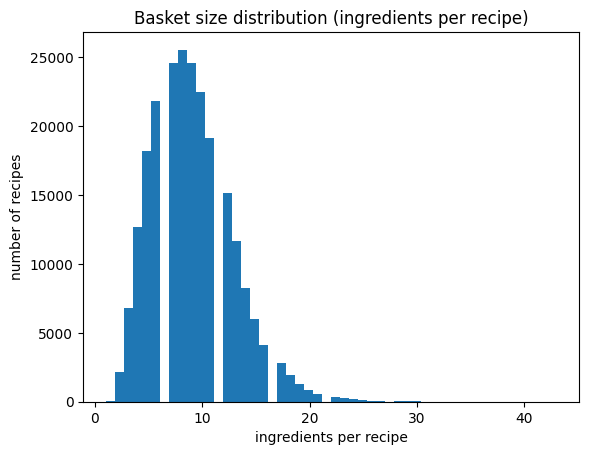

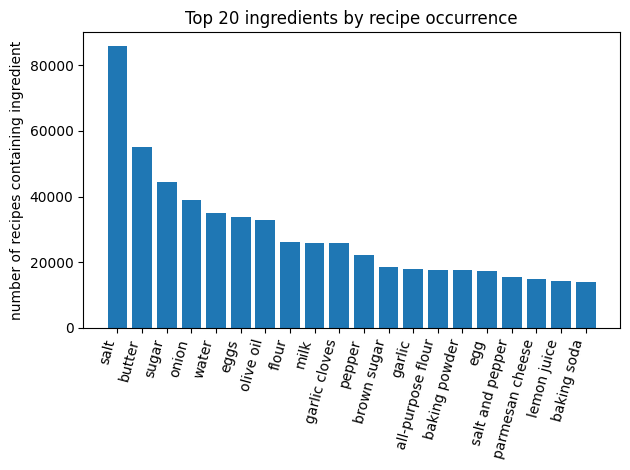

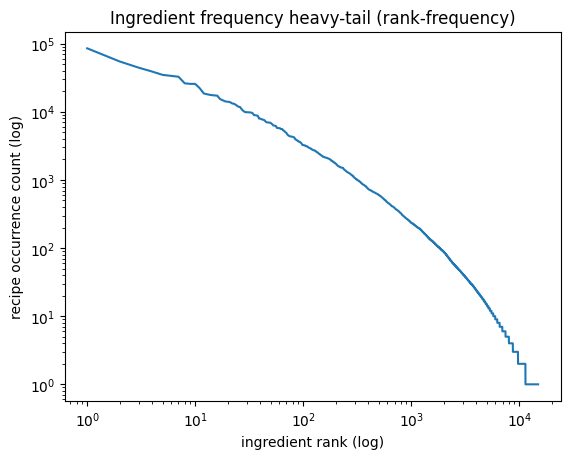

In [58]:
df = raw_recipes[["id", "ingredients"]].copy()

# Parse if ingredients are stored as strings like "['salt', 'pepper']"
if len(df) > 0 and isinstance(df["ingredients"].iloc[0], str):
    import ast
    df["ingredients"] = df["ingredients"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Basic cleaning
df["ingredients"] = df["ingredients"].apply(lambda x: x if isinstance(x, list) else np.nan)
df["basket_size"] = df["ingredients"].apply(lambda x: len(x) if isinstance(x, list) else np.nan)

print("num recipes:", len(df))
print("rows with missing/invalid ingredients:", int(df["basket_size"].isna().sum()))

sizes = df["basket_size"].dropna().astype(int)
print("\nbasket size summary:")
print(sizes.describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

# Ingredient frequencies by recipe occurrence
ing_counter = Counter()
for lst in df["ingredients"].dropna():
    # count presence per recipe, not repeated tokens
    for ing in set(lst):
        ing_counter[ing] += 1

n_recipes = len(df)
n_distinct = len(ing_counter)
total_occ = sum(ing_counter.values())

print("\ndistinct ingredient strings:", n_distinct)
print("total ingredient occurrences across recipes:", total_occ)

top_k = 30
top = ing_counter.most_common(top_k)
top_df = pd.DataFrame(top, columns=["ingredient", "recipe_count"])
top_df["fraction_of_recipes"] = top_df["recipe_count"] / n_recipes
print("\ntop ingredients by number of recipes they appear in:")
print(top_df)

# Concentration check
top_100_share = sum(c for _, c in ing_counter.most_common(100)) / total_occ if total_occ else np.nan
top_1000_share = sum(c for _, c in ing_counter.most_common(1000)) / total_occ if total_occ else np.nan
print("\nshare of ingredient occurrences in top 100 ingredients:", top_100_share)
print("share of ingredient occurrences in top 1000 ingredients:", top_1000_share)

# Plot 1: basket size histogram
plt.figure()
plt.hist(sizes.values, bins=50)
plt.xlabel("ingredients per recipe")
plt.ylabel("number of recipes")
plt.title("Basket size distribution (ingredients per recipe)")
plt.show()

# Plot 2: top ingredients bar chart (top 20)
top20 = ing_counter.most_common(20)
labels = [x[0] for x in top20]
counts = [x[1] for x in top20]

plt.figure()
plt.bar(range(len(labels)), counts)
plt.xticks(range(len(labels)), labels, rotation=75, ha="right")
plt.ylabel("number of recipes containing ingredient")
plt.title("Top 20 ingredients by recipe occurrence")
plt.tight_layout()
plt.show()

# Plot 3: ingredient frequency rank plot (heavy-tail check)
counts_sorted = np.array(sorted(ing_counter.values(), reverse=True))
ranks = np.arange(1, len(counts_sorted) + 1)

plt.figure()
plt.plot(ranks, counts_sorted)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ingredient rank (log)")
plt.ylabel("recipe occurrence count (log)")
plt.title("Ingredient frequency heavy-tail (rank-frequency)")
plt.show()


The typical recipe uses about 9 ingredients. Half the recipes are at 9 or fewer ingredients, and 90 percent are at 14 or fewer. The distribution is unimodal and right skewed, with a small tail up to 43 ingredients. This means ingredient baskets are not huge, so per recipe processing is cheap.

The ingredient vocabulary is large. We have 14,942 distinct ingredient strings over 231,637 recipes. Ingredient usage is extremely concentrated. The top 100 ingredients account for about 52 percent of all recipe ingredient occurrences, and the top 1,000 account for about 86 percent. The rank frequency plot shows a strong heavy tail, so most ingredients are rare.

The most common ingredients are basic staples. Salt appears in 37 percent of recipes, butter in 24 percent, sugar in 19 percent, and onion in 17 percent. This supports the idea that a small set of generic ingredients will dominate any co occurrence statistics.

Frequent itemset mining on the full vocabulary is likely to produce a large number of trivial patterns dominated by staples. If we set minsup high enough to be computationally safe, we mostly rediscover combinations like salt butter sugar flour. If we set minsup low enough to capture rare ingredient pairs, we will explode the search space because the vocabulary is almost 15k and the tail is long.
This is exactly the situation where embeddings and graph methods become attractive. Graph embeddings can learn useful structure from sparse co occurrence patterns without requiring high support counts. We can also downweight staples using weighting schemes like TF IDF style normalization so the graph is not dominated by salt and water.

### Recipes

We want basic structure of the user recipe interaction matrix. This tells us how sparse it is and how heavy the long tail is. Those are the two main justifications for matrix factorization and other collaborative filtering methods.

matrix shape and sparsity
interactions: 718379
unique users: 25076
unique recipes: 178265
density (observed / possible): 0.00016070496097160122
split sizes:
split
train         698901
test           12455
validation      7023
Name: count, dtype: int64

long tail
interactions per user quantiles:
0.50      7.0
0.90     46.0
0.95     93.0
0.99    400.0
interactions per recipe quantiles:
0.50     2.0
0.90     8.0
0.95    12.0
0.99    37.0
interaction share in top 1 recipe: 0.0015186969552283683
interaction share in top 100 recipes: 0.04989427586274098
interaction share in top 1000 recipes: 0.16714993060765976


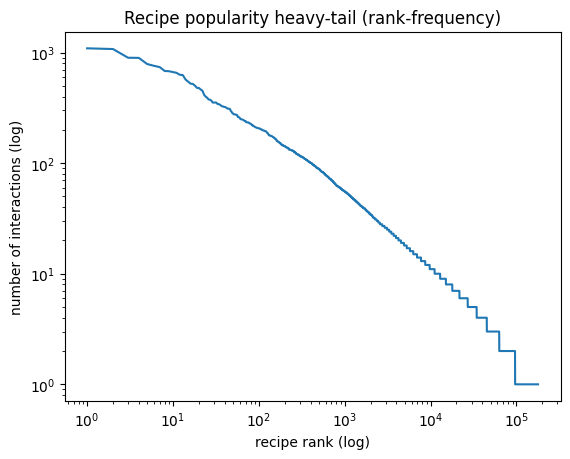

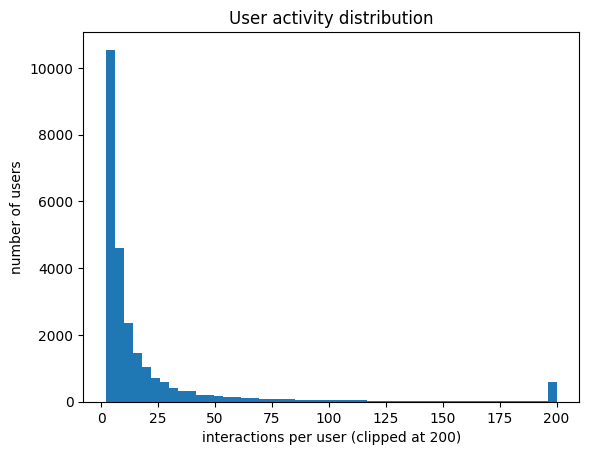


rating behavior
overall rating distribution:
rating
0.0     18000
1.0      3722
2.0      7336
3.0     27058
4.0    131846
5.0    530417
Name: count, dtype: int64


/tmp/ipython-input-1853660989.py:71: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_stats = tmp.groupby("bin").agg(n_users=("mean_rating","size"),


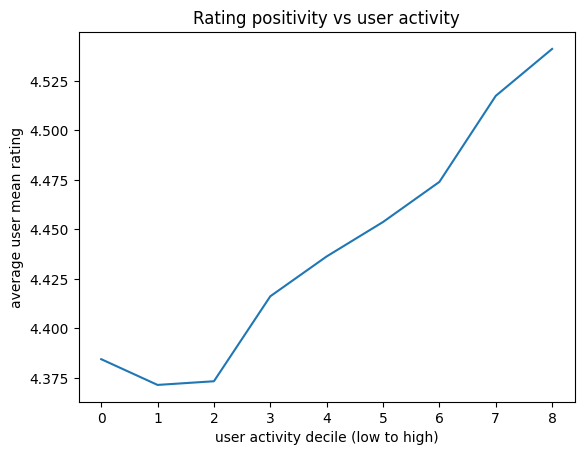


user mean rating summary:
count    25076.000000
mean         4.433629
std          0.703590
min          0.000000
50%          4.636364
90%          5.000000
99%          5.000000
max          5.000000
Name: rating, dtype: float64


In [60]:
df = interactions_all.copy()

# Matrix shape and sparsity
n_inter = len(df)
n_users = df["user_id"].nunique()
n_items = df["recipe_id"].nunique()
density = n_inter / (n_users * n_items)

print("matrix shape and sparsity")
print("interactions:", n_inter)
print("unique users:", n_users)
print("unique recipes:", n_items)
print("density (observed / possible):", density)
print("split sizes:")
print(df["split"].value_counts())

# Long tail summaries
per_user = df.groupby("user_id").size()
per_item = df.groupby("recipe_id").size()

print("\nlong tail")
print("interactions per user quantiles:")
print(per_user.quantile([0.5, 0.9, 0.95, 0.99]).to_string())
print("interactions per recipe quantiles:")
print(per_item.quantile([0.5, 0.9, 0.95, 0.99]).to_string())

top1_share = per_item.sort_values(ascending=False).head(1).sum() / n_inter
top100_share = per_item.sort_values(ascending=False).head(100).sum() / n_inter
top1000_share = per_item.sort_values(ascending=False).head(1000).sum() / n_inter
print("interaction share in top 1 recipe:", top1_share)
print("interaction share in top 100 recipes:", top100_share)
print("interaction share in top 1000 recipes:", top1000_share)

# log-log rank plot for recipe popularity
counts_sorted = np.array(sorted(per_item.values, reverse=True))
ranks = np.arange(1, len(counts_sorted) + 1)
plt.figure()
plt.plot(ranks, counts_sorted)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("recipe rank (log)")
plt.ylabel("number of interactions (log)")
plt.title("Recipe popularity heavy-tail (rank-frequency)")
plt.show()

# interactions per user histogram (clipped)
plt.figure()
plt.hist(np.clip(per_user.values, 0, 200), bins=50)
plt.xlabel("interactions per user (clipped at 200)")
plt.ylabel("number of users")
plt.title("User activity distribution")
plt.show()



# Rating behavior
print("\nrating behavior")
print("overall rating distribution:")
print(df["rating"].value_counts().sort_index())

user_mean = df.groupby("user_id")["rating"].mean()
user_count = per_user

# rating mean vs activity
bins = pd.qcut(user_count, q=10, duplicates="drop")
tmp = pd.DataFrame({"count": user_count, "mean_rating": user_mean, "bin": bins})
bin_stats = tmp.groupby("bin").agg(n_users=("mean_rating","size"),
                                  mean_of_means=("mean_rating","mean"),
                                  median_count=("count","median")).reset_index()

plt.figure()
plt.plot(range(len(bin_stats)), bin_stats["mean_of_means"].values)
plt.xlabel("user activity decile (low to high)")
plt.ylabel("average user mean rating")
plt.title("Rating positivity vs user activity")
plt.show()

print("\nuser mean rating summary:")
print(user_mean.describe(percentiles=[0.5, 0.9, 0.99]))


The interaction matrix has 25,076 users, 178,265 recipes, and 718,379 ratings.
The observed density is 0.0001607, so the matrix is extremely sparse. Most user recipe pairs are unobserved.


User activity is heavy tailed. The median user has 7 interactions, the 90th percentile has 46, and the 99th percentile has 400.
Recipe popularity is also heavy tailed. The median recipe has 2 interactions, the 90th percentile has 8, and the 99th percentile has 37.
Popularity is not concentrated in a tiny head. The top recipe is only 0.15 percent of interactions. The top 100 recipes are about 5.0 percent. The top 1,000 are about 16.7 percent.
The rank frequency plot confirms a long tail with many recipes having single digit interactions.


Ratings are highly positive. Rating 5 dominates with 530,417 out of 718,379 interactions.
There is a nontrivial amount of rating 0, with 18,000 entries. That suggests either missing value encoding or an implicit feedback marker. It should not be treated as an ordinary rating without checking the dataset documentation.
Average user mean rating increases with activity. More active users give slightly higher ratings on average, as shown by the upward trend across activity deciles.


Matrix factorization is appropriate because the matrix is very sparse and both users and recipes are long tailed. It can share statistical strength across similar users and items instead of relying on co occurrence counts that will be sparse for most recipes.
A graph based approach is also justified. The long tail implies many low degree nodes, where embedding methods can still learn neighborhood structure while exact counting methods become unstable.

### Temploral gaps

We want to see how regular user activity is over time. Large gaps and bursty behavior weaken simple sequential assumptions and support using either time-aware recommenders or treating interactions as mostly static preference data.


num dated interactions: 718379
num gaps: 693303
gap days summary:
count    693303.000000
mean         44.646688
std         164.112375
min           0.000000
50%           3.000000
90%          92.000000
95%         221.000000
99%         789.000000
max        5437.000000
Name: gap_days, dtype: float64
fraction gaps <= 1 day: 0.4206861934825033
fraction gaps <= 7 days: 0.6519804472214891
fraction gaps >= 30 days: 0.18962848855406655
fraction gaps >= 180 days: 0.060546398904952094


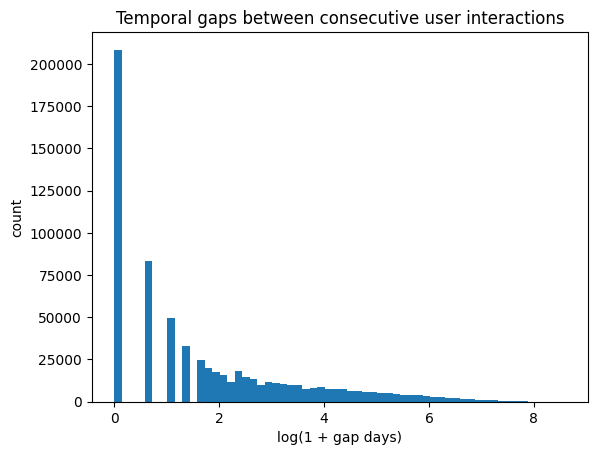

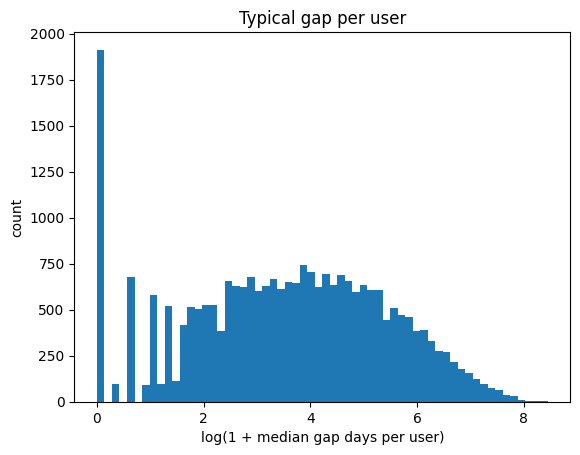

In [61]:
df = interactions_all[["user_id", "date"]].copy()
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# drop bad dates
df = df.dropna(subset=["date"])

# sort and compute per-user gaps
df = df.sort_values(["user_id", "date"])
df["gap_days"] = df.groupby("user_id")["date"].diff().dt.total_seconds() / (24 * 3600)

gaps = df["gap_days"].dropna()

print("num dated interactions:", len(df))
print("num gaps:", len(gaps))
print("gap days summary:")
print(gaps.describe(percentiles=[0.5, 0.9, 0.95, 0.99]))

# fraction of very small and very large gaps
print("fraction gaps <= 1 day:", (gaps <= 1).mean())
print("fraction gaps <= 7 days:", (gaps <= 7).mean())
print("fraction gaps >= 30 days:", (gaps >= 30).mean())
print("fraction gaps >= 180 days:", (gaps >= 180).mean())

# plot histogram on log-scaled x by using log1p
plt.figure()
plt.hist(np.log1p(gaps.values), bins=60)
plt.xlabel("log(1 + gap days)")
plt.ylabel("count")
plt.title("Temporal gaps between consecutive user interactions")
plt.show()

# per-user typical gap distribution
user_median_gap = df.groupby("user_id")["gap_days"].median().dropna()

plt.figure()
plt.hist(np.log1p(user_median_gap.values), bins=60)
plt.xlabel("log(1 + median gap days per user)")
plt.ylabel("count")
plt.title("Typical gap per user")
plt.show()


There are 693,303 consecutive interaction gaps after sorting by user and date.
Gaps are highly skewed. The median gap is 3 days, the 90th percentile is 92 days, and the 99th percentile is 789 days.
Short term activity is common. About 42.1 percent of gaps are within 1 day and about 65.2 percent are within 7 days.
Long inactivity is also common. About 19.0 percent of gaps are at least 30 days and about 6.1 percent are at least 180 days.
The mean gap is 44.6 days, which is inflated by long inactivity periods.

The gap histogram has a strong spike near zero and a long tail, consistent with bursty usage.
The per user median gap plot shows many users with near zero median gap and many users with typical gaps ranging from weeks to years.


User behavior is bursty with long inactive periods, so strictly sequential models that assume regular event spacing will be unstable without time handling.
A static collaborative filtering baseline like matrix factorization is a reasonable starting point because it does not rely on fine grained temporal continuity.
If you want time awareness, use simple time decay weighting or time binned models rather than heavy sequence models at this stage.

```
On my honor, I declare the following resources:
1. Collaborators:
None

2. Web Sources:
None

3. AI Tools:
- ChatGPT: Relied on ChatGPT to think about different EDA methods for different dimesions based on the ideas provided in the problem. Also used it to derive some meaningful explanations on the observations.
```

# (F) GitHub Portfolio Building –

- We expect you to post your project code on your professional GitHub as the course progresses; this is to help you build a portfolio, so you will have work that you have done to talk about when you are interviewing for jobs.

- Include a link to your public GitHub repository for the project, with your first notebook posted.

- We also encourage you to create an initial README describing the project; as an example, see: https://github.com/mariateleki/zscore Links to an external site.

https://github.com/aditya-s-gourishetty/food-data-analysis/blob/main/InitialEDA.ipynb

```
On my honor, I declare the following resources:
1. Collaborators:
None

2. Web Sources:
None

3. AI Tools:
None
```